<a href="https://colab.research.google.com/github/Yazzyhb/Classification-Obesitylevels/blob/master/Classification_Estimation_of_Obesity_Levels_Based_On_Eating_Habits_and_Physical_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atribute Information**


**key features**


*   Gender (Categorical): Biological gender of the individual, as metabolic rates and obesity risks can vary between genders.


*  Age (Continuous): Age can impact metabolism and health, making it a crucial factor in obesity estimation.


- Height (Continuous): Height, used with weight to calculate BMI, serves as a fundamental measure in obesity studies.

- Weight (Continuous): Body weight, along with height, is a direct measure used to assess body mass index and obesity levels.

- Family History with Overweight (Binary): This indicates whether an individual has a family history of obesity, offering insight into genetic predispositions.

- FAVC (Binary): Frequency of high-calorie food consumption, which directly impacts caloric intake and potential weight gain.

- FCVC (Continuous): Frequency of vegetable consumption, reflecting healthier dietary habits that help prevent obesity.

- NCP (Continuous): Number of main meals consumed daily, which influences metabolic and energy balance.

- CAEC (Categorical): Food consumption between meals, capturing habits like snacking, which may contribute to weight gain.

- SMOKE (Binary): Indicates if the individual smokes, as smoking habits can affect metabolism and overall health.

- CH2O (Continuous): Daily water intake, with adequate hydration supporting metabolism and healthy body functions.

- SCC (Binary): Whether the individual monitors calorie intake, representing proactive health management behaviors.

- FAF (Continuous): Frequency of physical activity, a major factor in managing weight and overall health.


- TUE (Continuous): Time spent using technology, as sedentary activities like screen time can impact obesity risk.

- CALC (Categorical): Alcohol consumption frequency, which can contribute to excess calorie intake.

- MTRANS (Categorical): Mode of transportation, as more active forms (e.g., walking, cycling) help maintain a healthier lifestyle.

**Target Feature**
- The target feature, **NObeyesdad** (Categorical), represents the obesity level of individuals, categorized into seven distinct classes. Each class defines a specific range of obesity or weight status, capturing various levels from underweight to severe obesity. This categorical variable is the primary output that the model aims to predict based on the input features, providing a structured way to assess and classify obesity levels across a spectrum.

**Importing Data**

In [1]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

In [3]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

**Shape Analysis**

In [4]:
# Displaying first five rows
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [5]:
#DataFrame shape
print(df.shape)
#DataFrame size
print(df.size)

(2111, 17)
35887


In [6]:
#DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# Statistical insights of numerical columns
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [8]:

# Statistical insights of catagorical columns
df.describe(include=object)

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351

- The DataFrame has 2,111 entries.
- There are 17 columns in total.
- There are 8 numeric columns (float64).
- There are 9 categorical columns (object).

**Data Preparation**

*Missing Values*



In [9]:
#Missing Values Count
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- All columns contain non-null values.

*Duplicate rows*

In [10]:
#Unique values of catagorical column
print(df['Gender'].value_counts())
print(df['family_history_with_overweight'].value_counts())
print(df['FAVC'].value_counts())
print(df['CAEC'].value_counts())
print(df['SMOKE'].value_counts())
print(df['SCC'].value_counts())
print(df['CALC'].value_counts())
print(df['MTRANS'].value_counts())
print(df['NObeyesdad'].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [11]:
# Check for duplicate rows in DataFrame 'df'
duplicate_rows = df.duplicated()

# Display the duplicate rows
df[duplicate_rows]

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
763    Male  21.0    1.62    70.0                             no  yes   2.0   
764    Male  21.0    1.62    70.0                             no  yes   2.0   
824    Male  21.0    1.62    70.0                             no  yes   2.0   
830    Male  21.0    1.62    70.0                             no  yes   2.0   
831    Male  21.0    1.62    70.0                             no  yes   2.0   
832    Male  21.0    1.62    70.0                             no  yes   2.0   
833    Male  21.0    1.62    70.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
921    Male  21.0    1.62    70.0                             no  yes   2.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
923    Male  21.0    1.62    70.0                             no  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
98   1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
106  1.0   Sometimes    no   2.0  no  2.0  0.0  Sometimes   
174  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
179  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
184  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
209  3.0   Sometimes    no   2.0  no  1.0  1.0  Sometimes   
309  1.0   Sometimes    no   1.0  no  0.0  1.0         no   
460  3.0  Frequently    no   1.0  no  1.0  1.0         no   
467  3.0  Frequently    no   1.0  no  1.0  0.0         no   
496  3.0   Sometimes    no   2.0  no  0.0  2.0  Sometimes   
527  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
659  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
663  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
763  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
764  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
824  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
830  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
831  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
832  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
833  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
834  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
921  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
922  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
923  1.0          no    no   3.0  no  1.0  0.0  Sometimes   

                    MTRANS           NObeyesdad  
98   Public_Transportation  Insufficient_Weight  
106  Public_Transportation        Normal_Weight  
174  Public_Transportation   Overweight_Level_I  
179  Public_Transportation   Overweight_Level_I  
184  Public_Transportation   Overweight_Level_I  
209  Public_Transportation        Normal_Weight  
309                Walking        Normal_Weight  
460  Public_Transportation        Normal_Weight  
467             Automobile        Normal_Weight  
496

In [12]:
df.duplicated().sum()

24

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(2087, 17)

- The DataFrame initially contained 2,111 entries.
- A total of 24 duplicate rows were identified.
- After removing duplicates, the DataFrame now has 2,087 entries.

*Detecting Outliers*

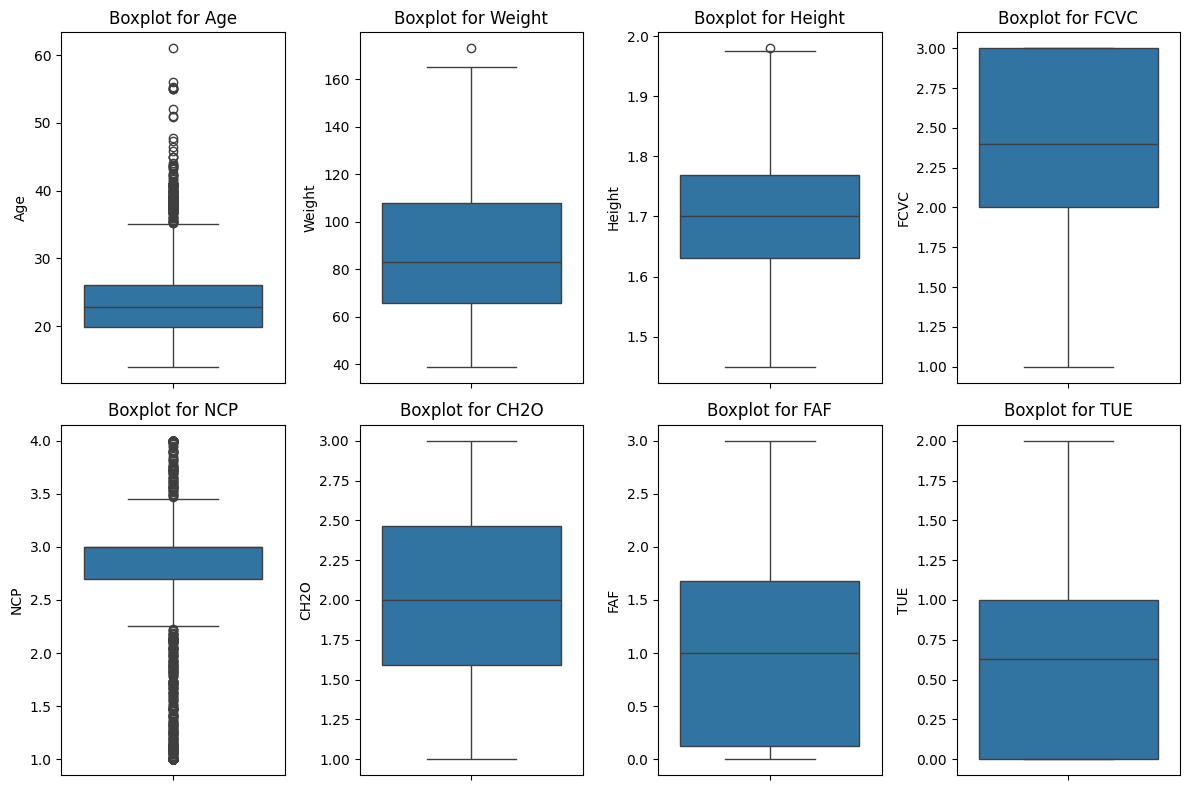

In [14]:
# List of continuous variables
continuous_vars = ['Age','Weight', 'Height',  'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Plotting boxplots to identify outliers
plt.figure(figsize=(12,8))
for i, feature in enumerate(continuous_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

Outliers: Age, weight, and the number of meals (NCP) have outliers that might need handling during preprocessing. Trends: Variables like FCVC, CH2O, FAF, and TUE have well-distributed values without significant anomalies.

Addressing these outliers is important, as they can distort analysis results and affect overall findings.

*Handling Outliers*

In [15]:
# Handling outliers by capping at 1.5*IQR (Interquartile Range)
for feature in continuous_vars:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

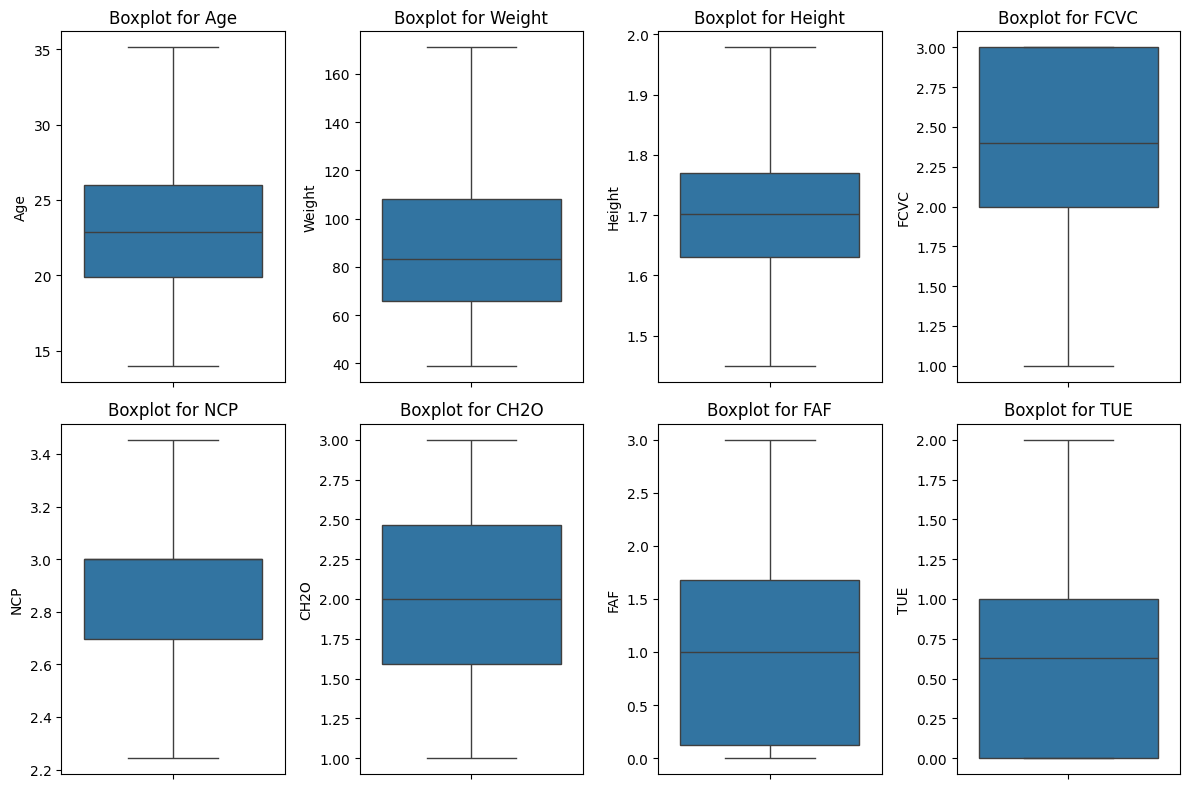

In [16]:
# Plotting boxplots to identify outliers
plt.figure(figsize=(12,8))
for i, feature in enumerate(continuous_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

*Label Encoding*

In [17]:
# List of binary and categorical columns to encode
binary= ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Initialize the LabelEncoder
label_encoders = {}

# Apply label encoding to specified columns
for col in binary:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
    print(f"{col} classes: {label_encoder.classes_}")
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])
print(f"{'NObeyesdad'} classes: {le.classes_}")

Gender classes: ['Female' 'Male']
family_history_with_overweight classes: ['no' 'yes']
FAVC classes: ['no' 'yes']
CAEC classes: ['Always' 'Frequently' 'Sometimes' 'no']
SMOKE classes: ['no' 'yes']
SCC classes: ['no' 'yes']
CALC classes: ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS classes: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
NObeyesdad classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [18]:
df

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  3.000000     2      0  2.000000    0  0.000000  1.000000   
1        0   3.0  3.000000     2      1  3.000000    1  3.000000  0.000000   
2        0   2.0  3.000000     2      0  2.000000    0  2.000000  1.000000   
3        0   3.0  3.000000     2      0  2.000000    0  2.000000  0.000000   
4        0   2.0  2.243667     2      0  2.000000    0  0.000000  0.000000   
...    ...   ...       ...   ...    ...       ...  ...       ...       ...   
2106     1   3.0  3.000000     2      0  1.728139    0  1.676269  0.906247   
2107     1   3.0  3.000000     2      0  2.005130    0  1.341390  0.599270   
2108     1   3.0  3.000000     2      0  2.054193    0  1.414209  0.646288   
2109     1   3.0  3.000000     2      0  2.852339    0  1.139107  0.586035   
2110     1   3.0  3.000000     2      0  2.863513    0  1.026452  0.714137   

      CALC  MTRANS  NObeyesdad  
0        3       3           1  
1        2       3           1  
2        1       3           1  
3        1       4           5  
4        2       3           6  
...    ...     ...         ...  
2106     2       3           4  
2107     2       3           4  
2108     2       3           4  
2109     2       3           4  
2110     2       3           4  

[2087 rows x 17 columns]

*Normalization/Standardization*

In [19]:

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize continuous variables
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# Verify normalization
print("\nNormalized Continuous Variables:")
print(df[continuous_vars].describe())


Normalized Continuous Variables:
               Age       Weight       Height         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.470977     0.362450     0.478131     0.710733     0.506818   
std       0.250982     0.198333     0.176330     0.267368     0.294730   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.280030     0.204484     0.340949     0.500000     0.375000   
50%       0.418800     0.333999     0.476069     0.698133     0.625000   
75%       0.568018     0.522690     0.604570     1.000000     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      0.502375     0.337604     0.331518  
std       0.304142     0.284492     0.304077  
min       0.000000     0.000000     0.000000  
25%       0.295461     0.041502     0.000000  
50%       0.50000

In [20]:
df.head()


Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.331344  0.321689  0.189337                               1     0   
1       0  0.331344  0.132460  0.128749                               1     0   
2       1  0.426013  0.662301  0.287792                               1     0   
3       1  0.615353  0.662301  0.363527                               0     0   
4       1  0.378679  0.624455  0.384733                               0     0   

   FCVC    NCP  CAEC  SMOKE  CH2O  SCC       FAF  TUE  CALC  MTRANS  \
0   0.5  0.625     2      0   0.5    0  0.000000  0.5     3       3   
1   1.0  0.625     2      1   1.0    1  1.000000  0.0     2       3   
2   0.5  0.625     2      0   0.5    0  0.666667  0.5     1       3   
3   1.0  0.625     2      0   0.5    0  0.666667  0.0     1       4   
4   0.5  0.000     2      0   0.5    0  0.000000  0.0     2       3   

   NObeyesdad  
0           1  
1           1  
2           1  
3           5  
4           6

**Exploratory Data Analysis (EDA)**

*Summary Statistics*

In [21]:
# Generate summary statistics for continuous variables
print("\nSummary Statistics for Continuous Variables:\n")
df[continuous_vars].describe()


Summary Statistics for Continuous Variables:



Age       Weight       Height         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.470977     0.362450     0.478131     0.710733     0.506818   
std       0.250982     0.198333     0.176330     0.267368     0.294730   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.280030     0.204484     0.340949     0.500000     0.375000   
50%       0.418800     0.333999     0.476069     0.698133     0.625000   
75%       0.568018     0.522690     0.604570     1.000000     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      0.502375     0.337604     0.331518  
std       0.304142     0.284492     0.304077  
min       0.000000     0.000000     0.000000  
25%       0.295461     0.041502     0.000000  
50%       0.500000     0.333333     0.315433  
75%       0.733096     0.559367     0.500000  
max       1.000000     1.000000     1.000000

- The dataset shows a diverse range of weights, heights, and ages, which could impact the analysis of obesity levels.
-The variability in dietary habits (FCVC, NCP, CH2O) suggests differing approaches to nutrition among individuals, which may correlate with obesity levels.
-The low average frequency of physical activity (FAF) indicates a potential area for public health intervention, as increased activity could mitigate obesity risk.
-The younger age distribution may influence the analysis of obesity levels, as younger individuals might have different lifestyle habits compared to older adults.

**Distribution Analysis**

Text(0.5, 1.0, 'Distribution of Obesity Levels')

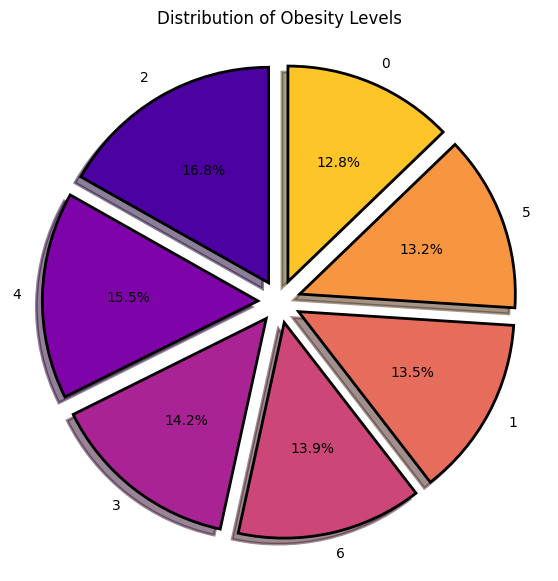

In [22]:

custom_palette = sns.color_palette("plasma", len(df['NObeyesdad'].value_counts()))
fig = plt.figure(figsize=(7,7))
colors = custom_palette
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['NObeyesdad'].value_counts()
explode = (0.1,) * len(tags)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of Obesity Levels')

Our target column further contains total seven catagories and all this data is well balanced.

From this data analysis we conclude that the dataset has:

No Missing values , Data is balanced

*Distribution of categorical variables*

In [23]:
dfv= pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

<ipython-input-24-88505e960c01>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dfv, x=col,  palette='Spectral')
<ipython-input-24-88505e960c01>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dfv, x=col,  palette='Spectral')
<ipython-input-24-88505e960c01>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dfv, x=col,  palette='Spectral')
<ipython-input-24-88505e960c01>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

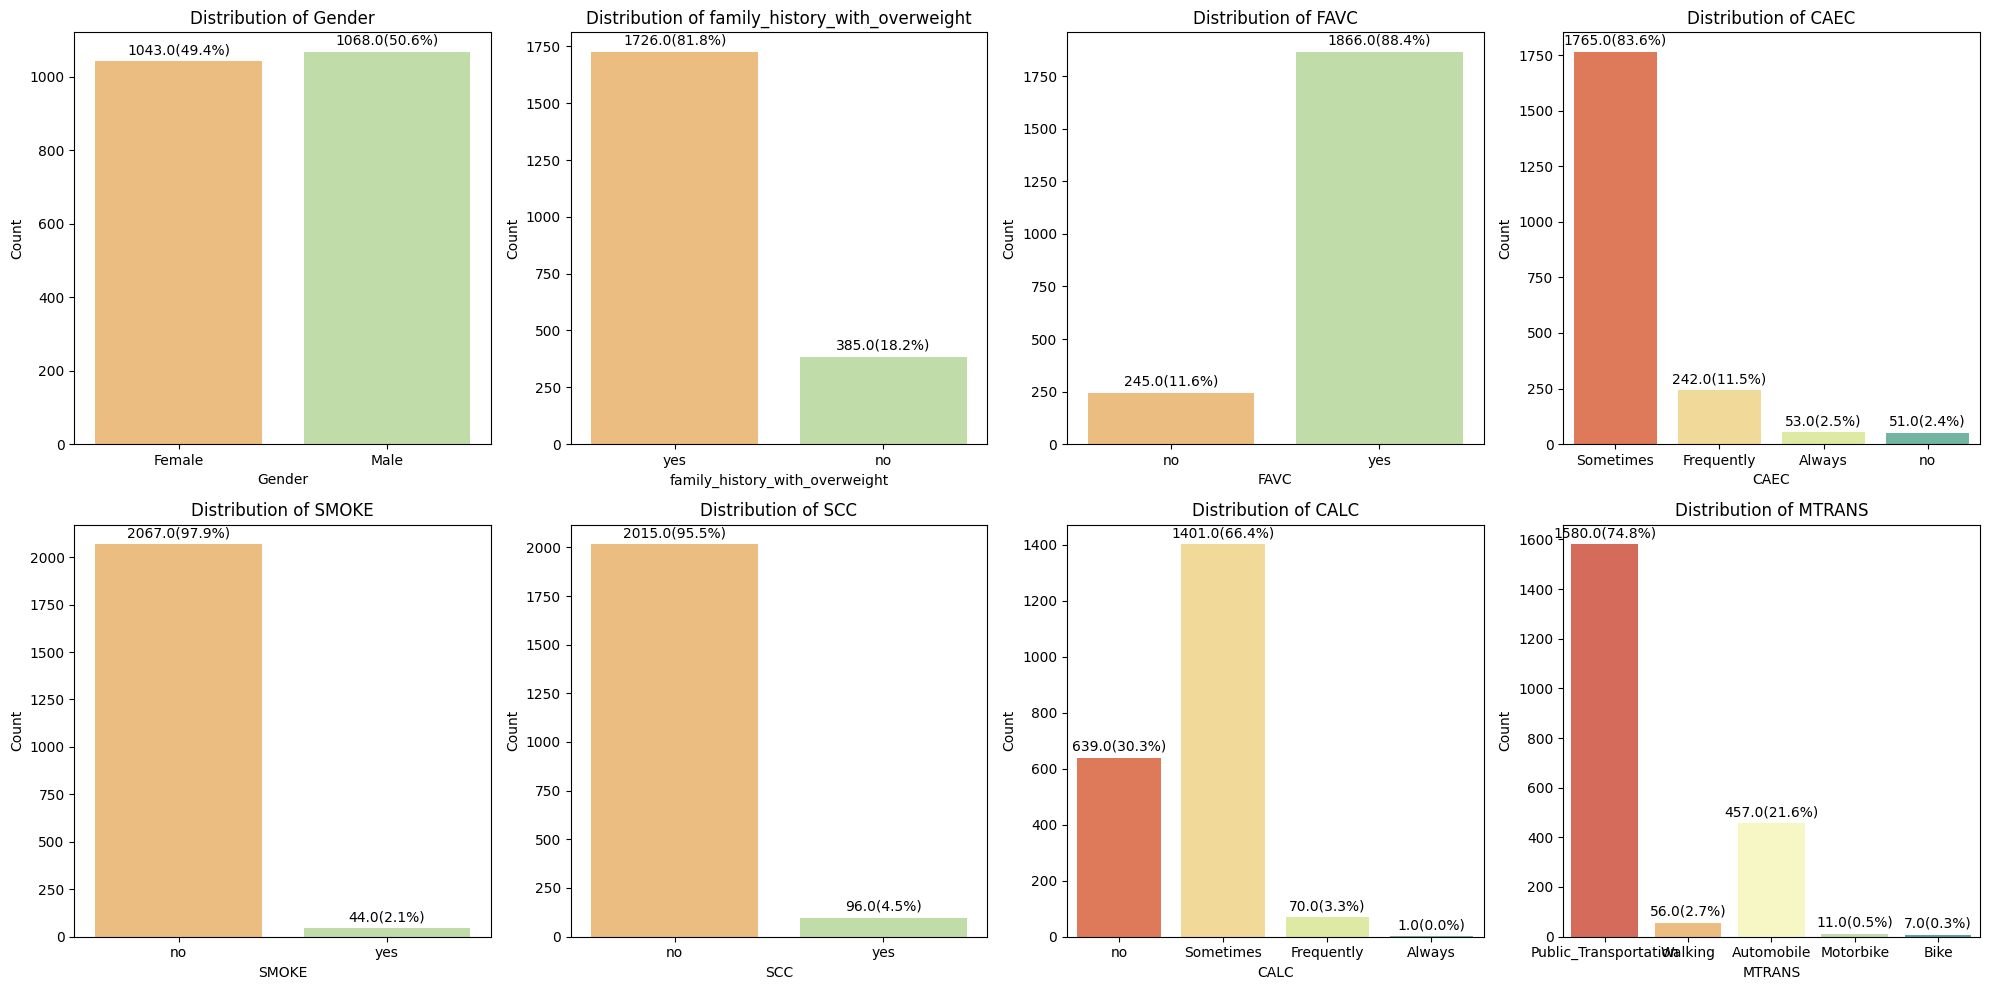

In [24]:
# List of categorical variables
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Set the figure size
plt.figure(figsize=(20, 10))

# Create subplots for each categorical variable
n_columns = 4
n_rows = (len(categorical_vars) + n_columns - 1) // n_columns  # Calculate the number of rows needed

for i, col in enumerate(categorical_vars):
    # Create subplot for each variable
    plt.subplot(n_rows, n_columns, i + 1)  # Update to n_rows and n_columns

    # Plot countplot for the categorical variable
    ax = sns.countplot(data=dfv, x=col,  palette='Spectral')

    # Add titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Total count for percentage calculation
    total_count = len(dfv)

    # Exact count and percentage labels on top of the bars
    for p in ax.patches:  # Iterate through the bars
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{height}({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),  # Offset the text slightly above the bar
                    textcoords='offset points')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

- **Gender Distribution**: The dataset shows a balanced gender distribution with 49.4% female and 50.6% male participants.

- **Family History of Overweight**: A significant 81.8% of individuals reported having a family member suffering from overweight, indicating a potential genetic or environmental influence on weight.

- **Physical Activity**: The majority of participants (88.4%) engage in physical activity, which is a positive factor for maintaining a healthy weight.

- **Food Consumption Habits**: 83.6% of respondents consume food between meals sometimes, suggesting a common behavior that could impact dietary habits.

- **Smoking Status**: An overwhelming 97.9% of participants do not smoke, which is beneficial for overall health and weight management.

- **Monitoring Caloric Intake**: A large majority (95.5%) do not monitor their caloric intake, indicating a potential area for nutritional education.

- **Alcohol Consumption**: 66.4% of participants consume alcohol sometimes, pointing to a prevalent social drinking culture.

- **Public Transport Usage**: Finally, 74.8% of individuals rely on public transportation, which may reflect lifestyle choices related to activity levels.



*Distribution of continuous variables*

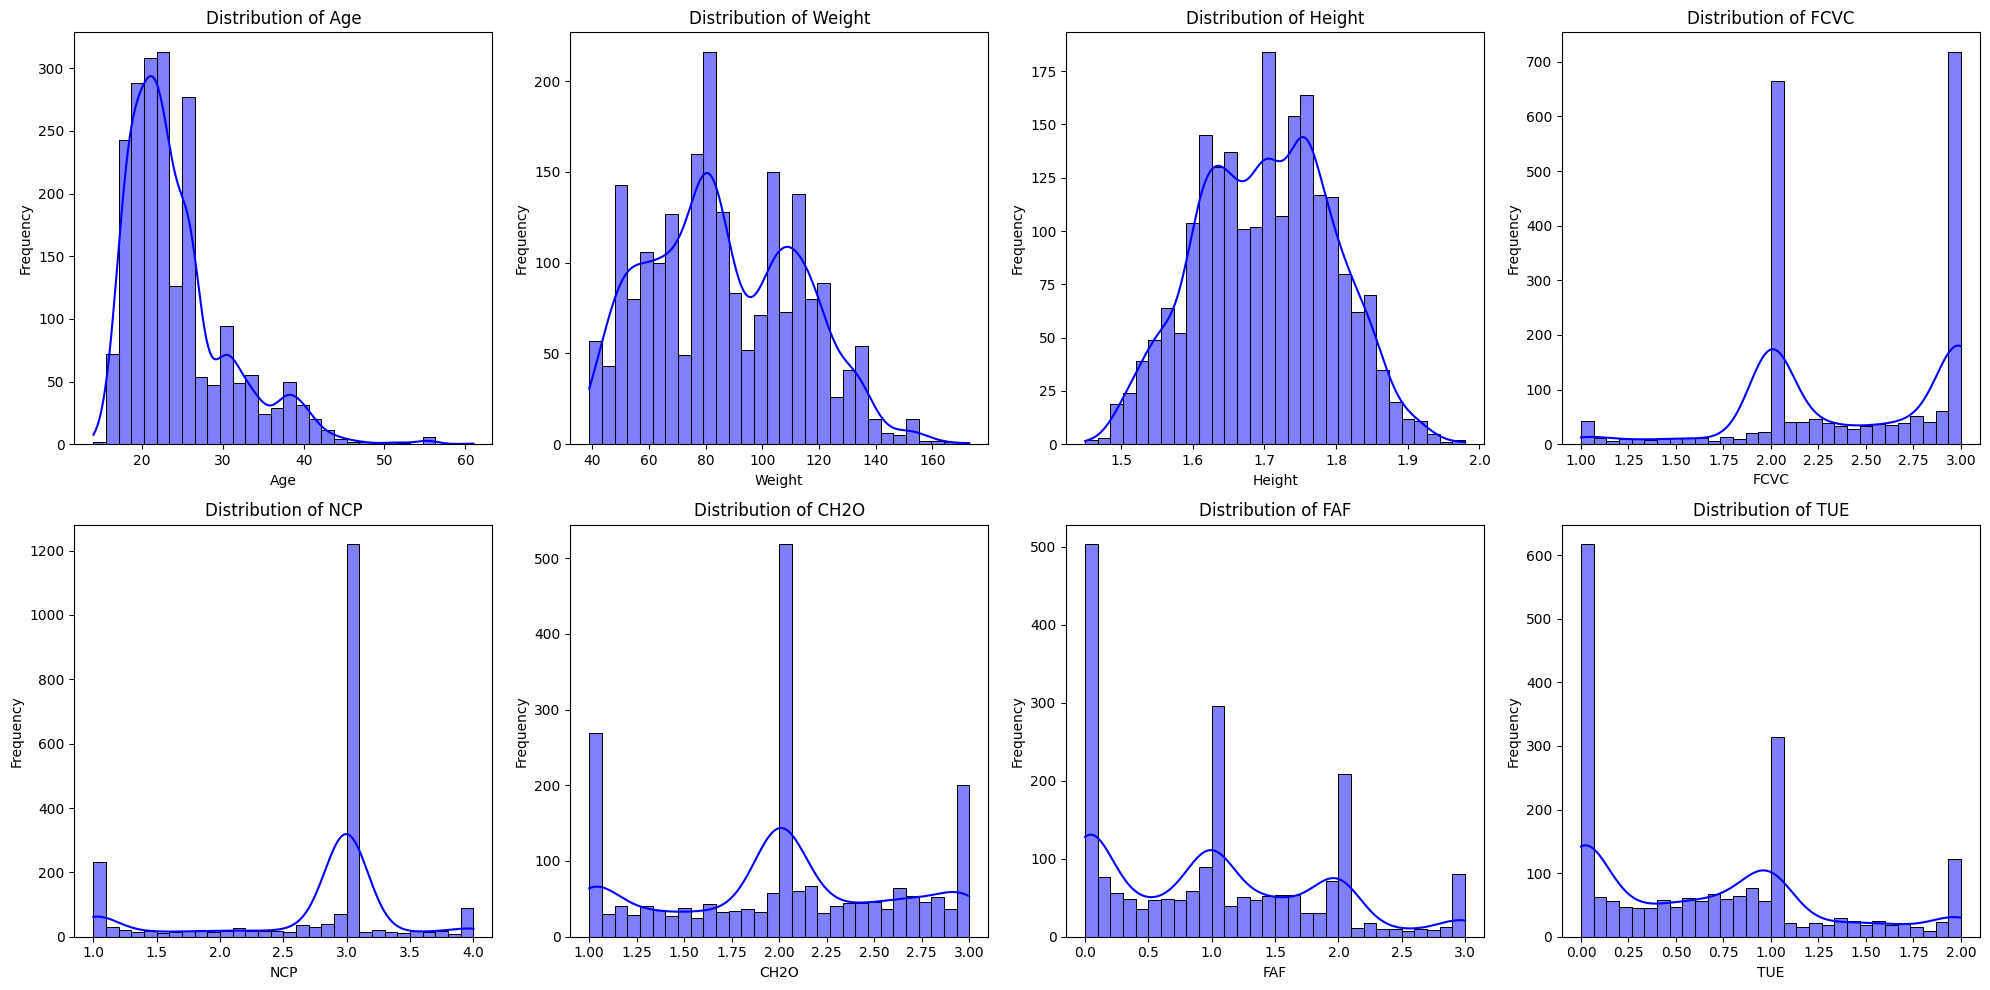

In [25]:
plt.figure(figsize=(20, 10))  # Adjust the figure size if necessary

# Create subplots
n_columns = 4
n_rows = (len(continuous_vars) + n_columns - 1) // n_columns  # Calculate the number of rows needed

for i, col in enumerate(continuous_vars):
    # Create subplot for each variable
    plt.subplot(n_rows, n_columns, i + 1)  # Update to n_rows and n_columns

    # Plot histogram with KDE (density plot)
    sns.histplot(dfv[col], kde=True, color='blue', bins=30)

    # Add titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots

plt.show()

The above diagrams represent frequency of each continuous value.

- we have maximum number of people between age range of 20-30.
- Physical activity frequency is varying with very less people working out daily. (FAF)
- more than 1200 people prefer three main meals. (NCP)
- Frequency of consumpion of vegetables is high. (FCVC)

*Relationship Exploration*

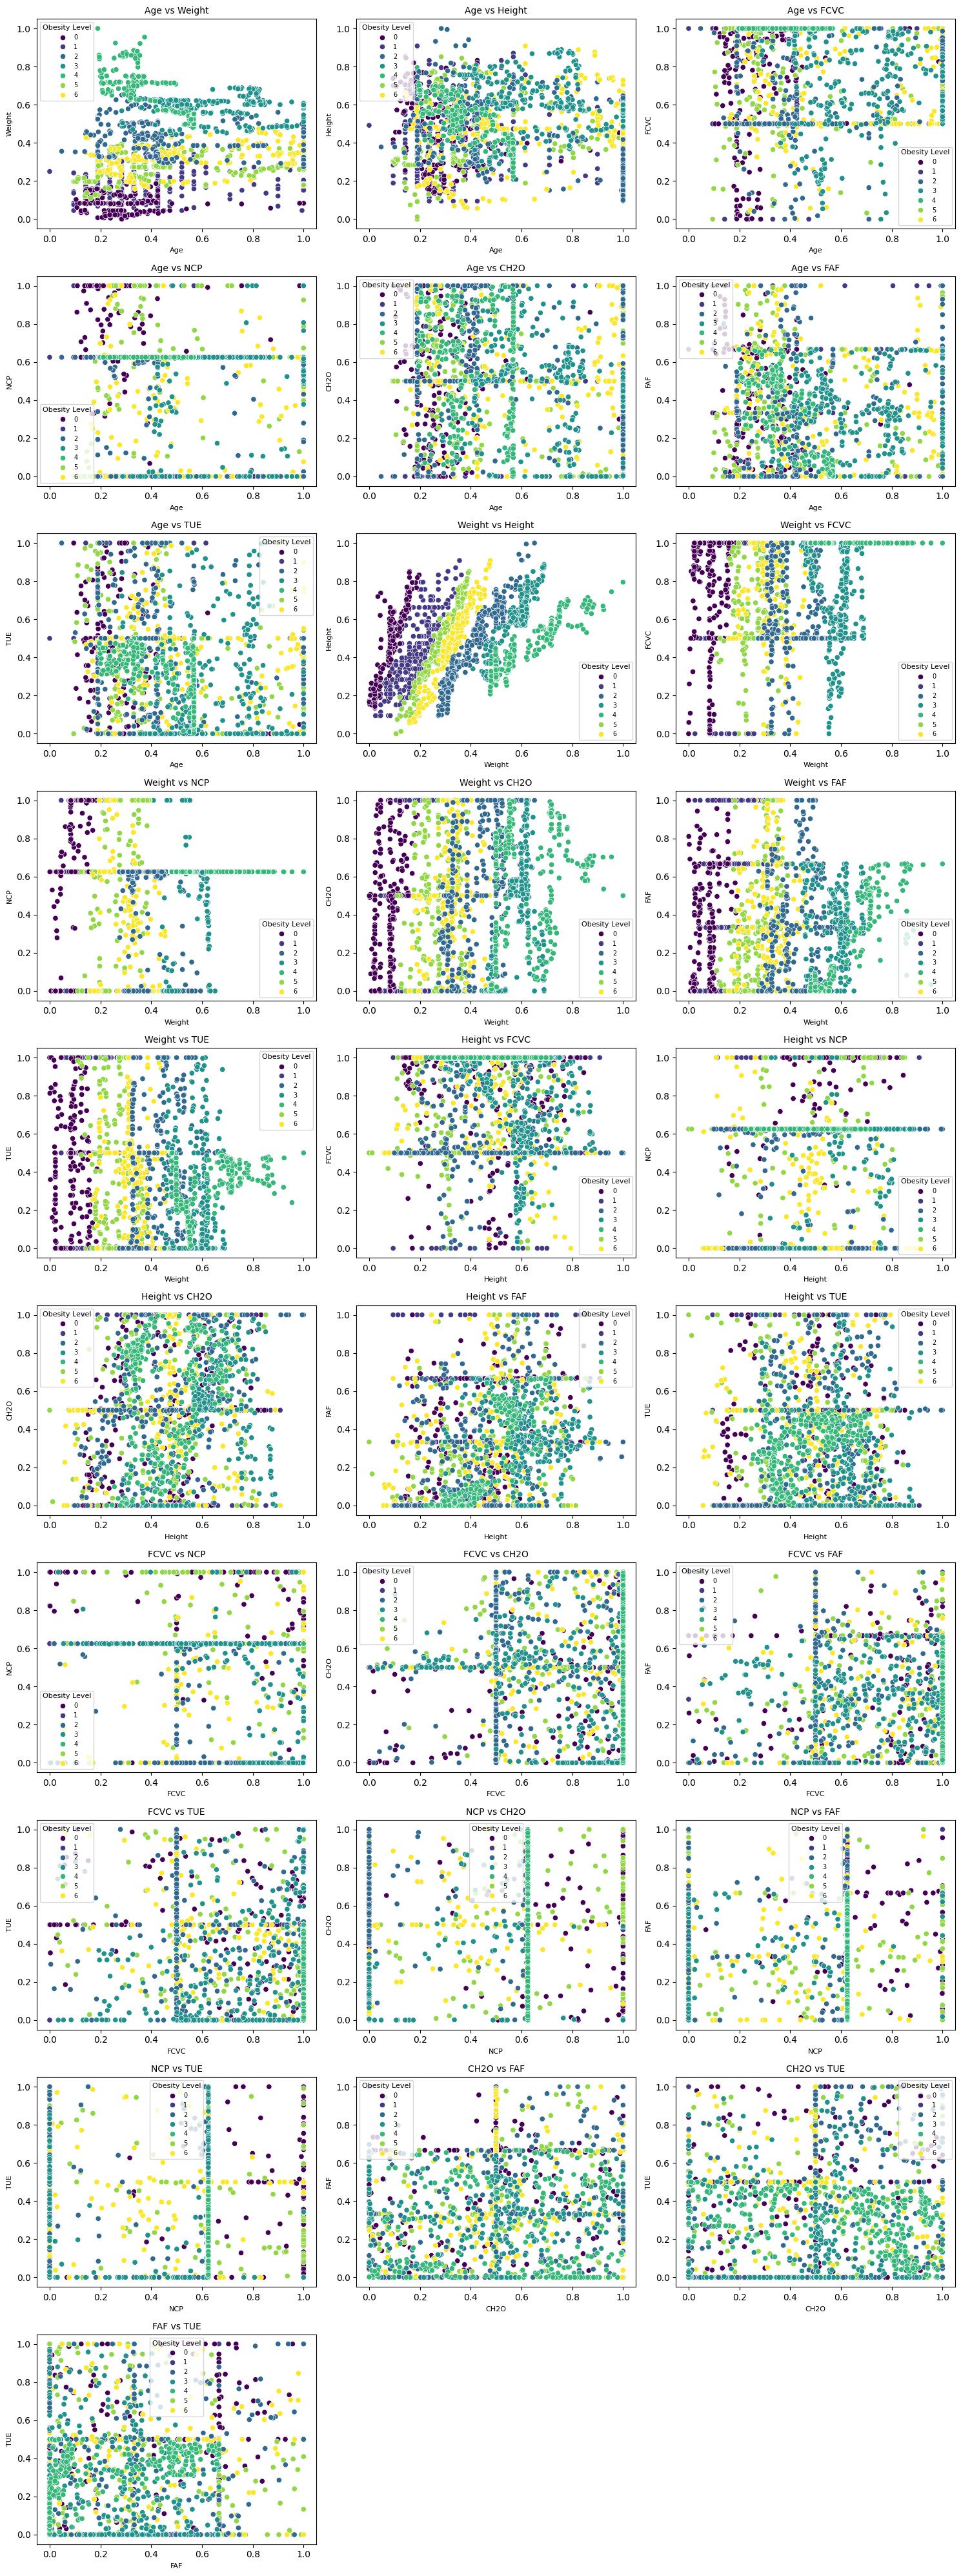

In [26]:
# Pairwise relationships in the dataset

import itertools

combinations = list(itertools.combinations(continuous_vars, 2))
n_plots = len(combinations)
n_cols = 3  # Number of columns in the grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate the required number of rows

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D grid to iterate over it easily

# Plot each pairwise scatterplot
for ax, (feature1, feature2) in zip(axes, combinations):
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='NObeyesdad', palette='viridis', ax=ax)
    ax.set_title(f'{feature1} vs {feature2}', fontsize=10)
    ax.set_xlabel(feature1, fontsize=8)
    ax.set_ylabel(feature2, fontsize=8)
    ax.legend(title='Obesity Level', fontsize=7, title_fontsize=8)

# Hide any unused subplots
for ax in axes[len(combinations):]:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


*Correlation matrix*

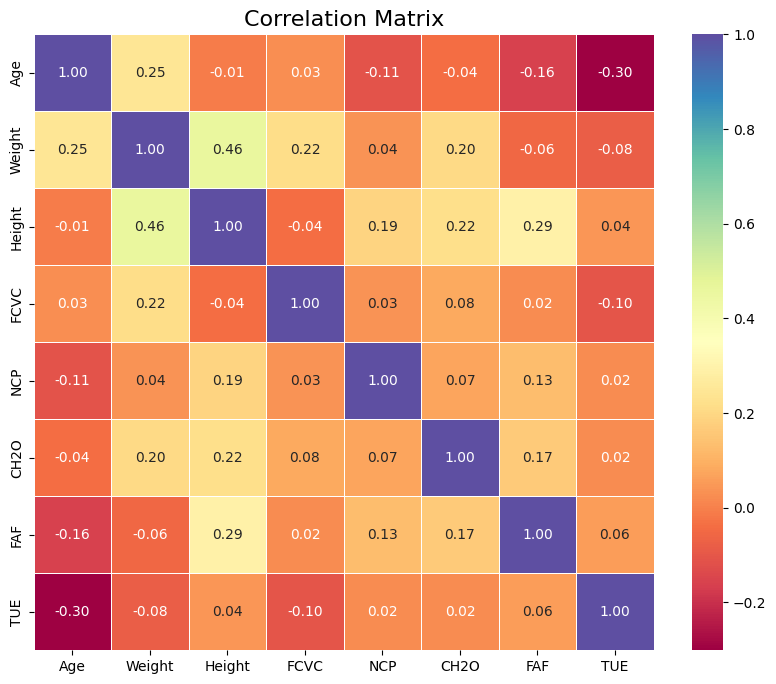

In [27]:
#the correlation matrix for the continuous variables
corr_matrix = df[continuous_vars].corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)

#titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Above diagram represents heatmap of correlation.

Only Height and Weight column shows good correlation.

**Train Test Split**

*Feature Engineering and Scaling*

In [28]:
# Now we will devide our dataframe into X and y.
# X -----> Independant features
# y -----> Target feature

X = df.drop(columns=['NObeyesdad'])  # Features (drop target column)
y = df['NObeyesdad'] # Target variable


In [29]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(X, y)

In [30]:
# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

Features  feature_importances_
3                           Weight              0.472727
2                           Height              0.218379
0                           Gender              0.161060
1                              Age              0.044213
14                            CALC              0.025437
5                             FAVC              0.020437
6                             FCVC              0.017888
8                             CAEC              0.011348
10                            CH2O              0.006456
7                              NCP              0.005597
13                             TUE              0.004636
9                            SMOKE              0.003825
4   family_history_with_overweight              0.002489
12                             FAF              0.002004
11                             SCC              0.001759
15                          MTRANS              0.001744

*Feature Selection*

In [31]:

l = ['Weight','Height','Gender','Age','CALC','FAVC','FCVC','CAEC','CH2O','TUE','NCP','MTRANS','SMOKE']
scaled_x = X[l]

*sampling dataset into train and test set*


In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=40)

In [33]:
print('Shape of train_X is',X_train.shape)
print('Shape of train_y is',y_train.shape)
print('Shape of test_X is',X_test.shape)
print('Shape of test_y is',y_test.shape)

Shape of train_X is (1669, 13)
Shape of train_y is (1669,)
Shape of test_X is (418, 13)
Shape of test_y is (418,)


**Model Implementation**

Now we will try to differnent models on data and choose best one which is performing better for model deployment.

following are the classification models that we are going to implement :

- Logistic Regression
- Random Forest
- XGBoost
- Neural Network
- Bagging
- Stacking
- Voting
- Hypertuning & Cross-validation

***Model 1 - Logistic Regression***

In [34]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR= LR.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7334
Test Accuracy: 0.7344
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       220
           1       0.58      0.41      0.48       224
           2       0.71      0.71      0.71       273
           3       0.80      0.97      0.88       238
           4       0.95      0.99      0.97       262
           5       0.61      0.59      0.60       227
           6       0.58      0.51      0.54       225

    accuracy                           0.73      1669
   macro avg       0.71      0.73      0.72      1669
weighted avg       0.72      0.73      0.72      1669

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        47
           1       0.71      0.43      0.54        58
           2       0.71      0.71      0.71        78
           3       0.76      1.00      0.86        59
           4 

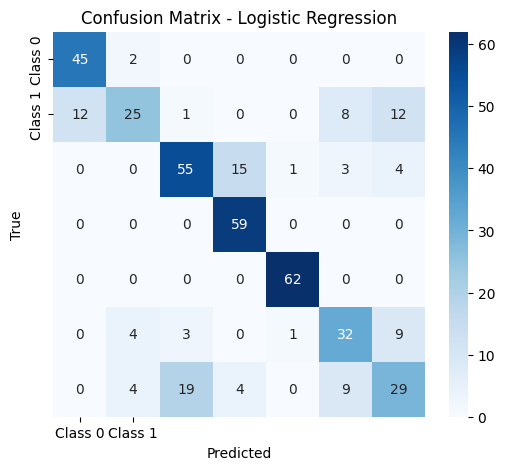

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on Training Data
train_accuracy = accuracy_score(y_train, y_train_pred_LR)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on Test Data
test_accuracy = accuracy_score(y_test, y_test_pred_LR)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report (includes precision, recall, and F1 score)
print("Classification Report (Train Data):")
print(classification_report(y_train, y_train_pred_LR))

print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_LR))

# Compute confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_LR)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



**Logistic Regression**
- Decent performance with some misclassifications. The misclassifications are particularly significant for Class 1, Class 2, and Class 5, which could indicate challenges in distinguishing these classes.
- In test data, there is more confusion between Class 1 and Class 5, as well as between Class 2 and Class 6.

***Model 2 - Random Forest***

In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF= RF.predict(X_test)

Training Accuracy (Random Forest): 1.0000
Test Accuracy (Random Forest): 0.9761
Classification Report (Train Data - Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00       238
           4       1.00      1.00      1.00       262
           5       1.00      1.00      1.00       227
           6       1.00      1.00      1.00       225

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669

Classification Report (Test Data - Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.94      1.00      0.97        58
           2       0.99      0.97      0.98        78
   

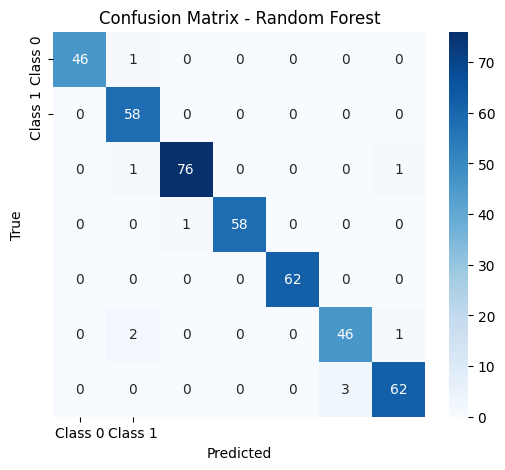

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on Training Data
train_accuracy_RF = accuracy_score(y_train, y_train_pred_RF)
print(f"Training Accuracy (Random Forest): {train_accuracy_RF:.4f}")

# Evaluate on Test Data
test_accuracy_RF = accuracy_score(y_test, y_test_pred_RF)
print(f"Test Accuracy (Random Forest): {test_accuracy_RF:.4f}")

# Classification Report (includes precision, recall, and F1 score)
print("Classification Report (Train Data - Random Forest):")
print(classification_report(y_train, y_train_pred_RF))

print("Classification Report (Test Data - Random Forest):")
print(classification_report(y_test, y_test_pred_RF))

# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_RF)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Random Forest**
- the train data performance is perfect with no misclassifications.
- For the test data, the model performs well, but there are some misclassifications. The misclassification rates are relatively low, with the most errors occurring for Class 1 and Class 5.

***Model 3 - XGBoost***

In [38]:
# Creating the model
xgb = XGBClassifier()
# Training the model
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb= xgb.predict(X_test)

Training Accuracy (XGBoost): 1.0000
Test Accuracy (XGBoost): 0.9880
Classification Report (Train Data - XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00       238
           4       1.00      1.00      1.00       262
           5       1.00      1.00      1.00       227
           6       1.00      1.00      1.00       225

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669

Classification Report (Test Data - XGBoost):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.97      0.97      0.97        58
           2       1.00      0.99      0.99        78
           3       1.00    

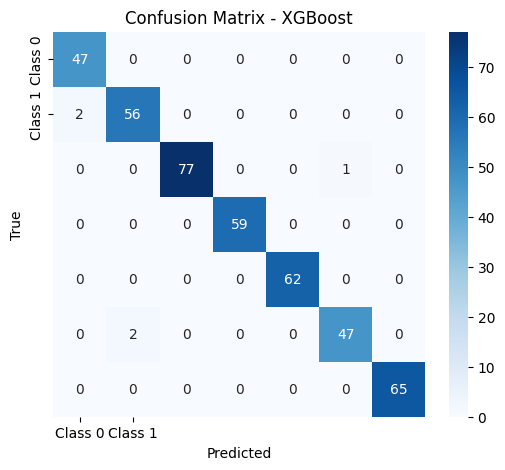

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on Training Data
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"Training Accuracy (XGBoost): {train_accuracy_xgb:.4f}")

# Evaluate on Test Data
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Accuracy (XGBoost): {test_accuracy_xgb:.4f}")

# Classification Report (includes precision, recall, and F1 score)
print("Classification Report (Train Data - XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

print("Classification Report (Test Data - XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))


# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**XGBoost** is performing very well with a training accuracy of 100% and test accuracy of 99%. It demonstrates strong performance, especially in distinguishing most of the classes.


***Model 4 - Neural Network***

*Defining parameters*

In [40]:
test_size = 0.20
learning_rates = [0.001]
activation_functions = ['logistic']
max_iter_values = [10000]


*Storing accuracy score for each model and parameter*

In [41]:
accuracy_scores = { 'Neural Network': []}
iteration_count = 0

*Storing accuracy score for each learning rate*

In [42]:
learning_rate_scores = {'Neural Network': {}}
for lr in learning_rates:
    learning_rate_scores['Neural Network'][lr] = []

*Model with new learning rate, activating function, iterations*

In [43]:
def update_models(test_size, learning_rate, activation_function, max_iter):
    global iteration_count

   # Train a Neural Network
    mlp = MLPClassifier(activation=activation_function, max_iter=max_iter, learning_rate_init=learning_rate, hidden_layer_sizes=(100,))
    mlp.fit(X_train, y_train)
    predictions_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, predictions_mlp)
    accuracy_scores['Neural Network'].append(accuracy_mlp)
    learning_rate_scores['Neural Network'][learning_rate].append(accuracy_mlp)

    # after updating models increment iteration count
    iteration_count += 1

    # Print accuracy and confusion matrices
    print(f"\nIteration {iteration_count} - Learning Rate: {learning_rate}, Activation Function: {activation_function}, Max Iter: {max_iter}")

    print(f"Accuracy for Neural Network with {activation_function} activation function = {accuracy_mlp:.6f}")

    print("\nConfusion Matrix for Neural Network:")
    print(confusion_matrix(y_test, predictions_mlp))

*Function for plot curve*

In [44]:
for learning_rate in learning_rates:
    for activation_function in activation_functions:
        for max_iter in max_iter_values:
            update_models(test_size, learning_rate, activation_function, max_iter)


Iteration 1 - Learning Rate: 0.001, Activation Function: logistic, Max Iter: 10000
Accuracy for Neural Network with logistic activation function = 0.980861

Confusion Matrix for Neural Network:
[[47  0  0  0  0  0  0]
 [ 0 58  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  1  0  0  0 47  1]
 [ 0  0  3  0  0  2 60]]


***Model 5 - Bagging***

In [45]:
from sklearn.ensemble import BaggingClassifier

# Create the Bagging model
bagging_clf = BaggingClassifier(estimator=XGBClassifier(), n_estimators=10, random_state=42)

# Fit the model
bagging_clf.fit(X_train, y_train)

# Predict on test data
bagging_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, bagging_pred)
conf_matrix = confusion_matrix(y_test, bagging_pred)
class_report = classification_report(y_test, bagging_pred)

print(f"Bagging Classifier Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)


Bagging Classifier Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.98      0.97        58
           2       0.99      0.97      0.98        78
           3       0.98      0.98      0.98        59
           4       1.00      1.00      1.00        62
           5       0.96      0.96      0.96        49
           6       0.98      0.98      0.98        65

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418


Confusion Matrix:
[[46  1  0  0  0  0  0]
 [ 1 57  0  0  0  0  0]
 [ 0  0 76  1  0  1  0]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  1  0  0  0 47  1]
 [ 0  0  0  0  0  1 64]]


***Model 6 - Stacking***

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

Stacking Classifier Training Accuracy: 1.0000
Stacking Classifier Test Accuracy: 0.9880
Confusion Matrix:
[[47  0  0  0  0  0  0]
 [ 2 56  0  0  0  0  0]
 [ 0  0 77  0  0  1  0]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  2  0  0  0 47  0]
 [ 0  0  0  0  0  0 65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.97      0.97      0.97        58
           2       1.00      0.99      0.99        78
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        62
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        65

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



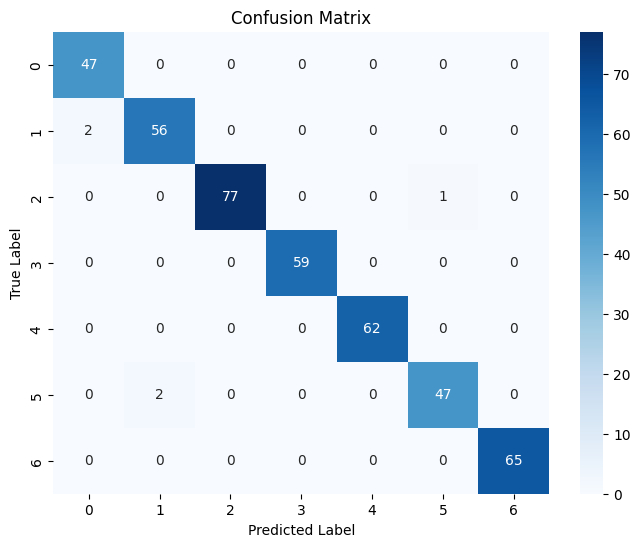

In [47]:
from sklearn.ensemble import StackingClassifier


# Define base learners
base_learners = [
    ('log_reg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('nn' , MLPClassifier() )
]

# Define the final estimator (meta-model)
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Fit the model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
train_accuracy_stacking = stacking_clf.score(X_train, y_train)
test_accuracy_stacking = stacking_clf.score(X_test, y_test)

print(f"Stacking Classifier Training Accuracy: {train_accuracy_stacking:.4f}")
print(f"Stacking Classifier Test Accuracy: {test_accuracy_stacking:.4f}")
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for the test set
y_pred = stacking_clf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



***Model 7 - Voting***

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Voting Classifier Training Accuracy: 0.9994
Voting Classifier Test Accuracy: 0.9809

Voting Classifier - Confusion Matrix:
[[47  0  0  0  0  0  0]
 [ 2 56  0  0  0  0  0]
 [ 0  0 76  1  0  1  0]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  1  0  0  0 47  1]
 [ 0  0  0  0  0  2 63]]

Voting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.98      0.97      0.97        58
           2       1.00      0.97      0.99        78
           3       0.98      1.00      0.99        59
           4       1.00      1.00      1.00        62
           5       0.94      0.96      0.95        49
           6       0.98      0.97      0.98        65

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



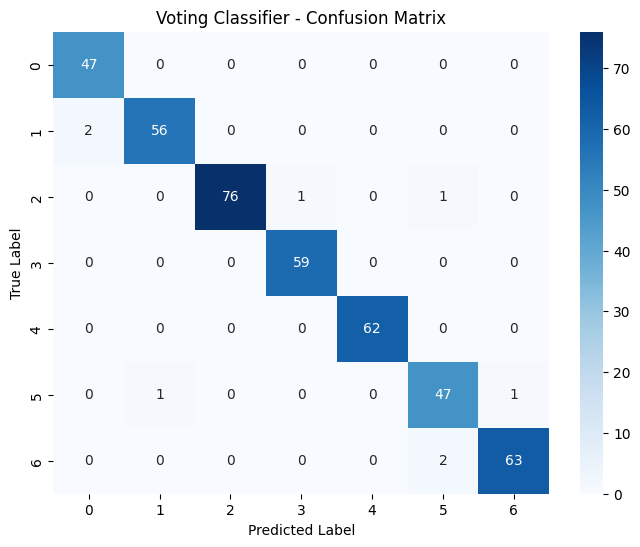

In [51]:
from sklearn.ensemble import VotingClassifier

# Define base learners
base_learners = [
    ('log_reg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('nn' , MLPClassifier() )
]

# Create the VotingClassifier (using the same base learners)
voting_clf = VotingClassifier(estimators=base_learners, voting='soft')

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
train_accuracy_voting = voting_clf.score(X_train, y_train)
test_accuracy_voting = voting_clf.score(X_test, y_test)

print(f"\nVoting Classifier Training Accuracy: {train_accuracy_voting:.4f}")
print(f"Voting Classifier Test Accuracy: {test_accuracy_voting:.4f}")

# Predict using Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Confusion Matrix and Classification Report for Voting Classifier
print("\nVoting Classifier - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("\nVoting Classifier - Classification Report:")
print(classification_report(y_test, y_pred_voting))

# Visualize Confusion Matrix for Voting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Voting Classifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

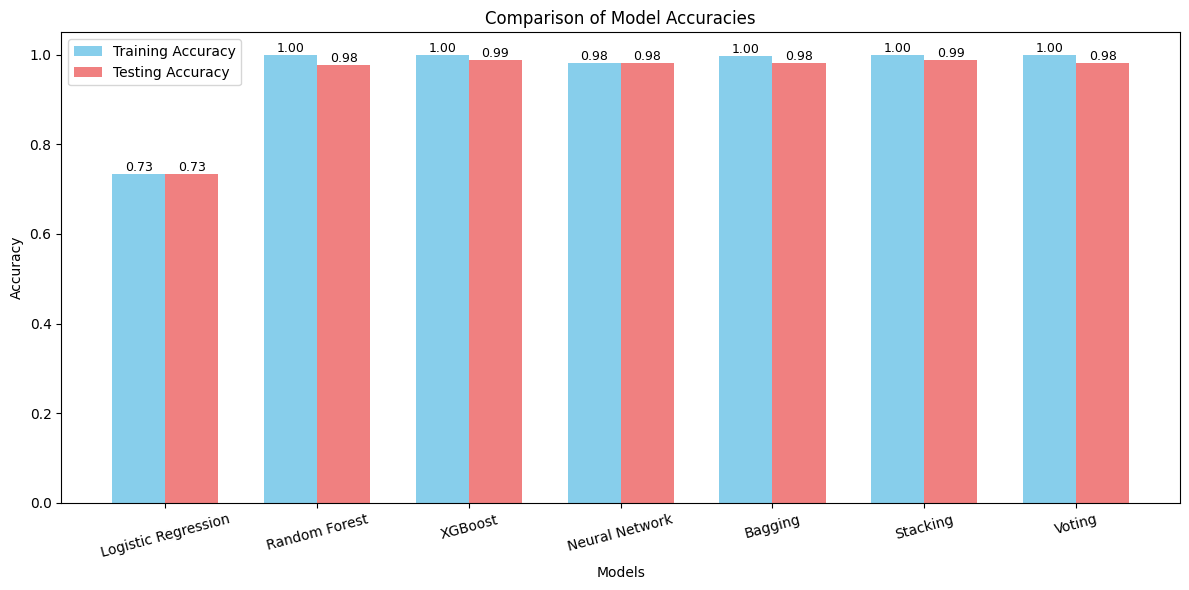

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and their accuracy scores
models = [
    "Logistic Regression",
    "Random Forest",
    "XGBoost",
    "Neural Network",
    "Bagging",
    "Stacking",
    "Voting"
]

# Training and testing accuracies for each model
train_accuracies = [
    LR.score(X_train, y_train),
    RF.score(X_train, y_train),
    xgb.score(X_train, y_train),
    accuracy_scores['Neural Network'][-1],  # Latest Neural Network accuracy
    bagging_clf.score(X_train, y_train),
    train_accuracy_stacking,
    train_accuracy_voting
]

test_accuracies = [
    LR.score(X_test, y_test),
    RF.score(X_test, y_test),
    xgb.score(X_test, y_test),
    accuracy_scores['Neural Network'][-1],  # Latest Neural Network accuracy
    accuracy,
    test_accuracy_stacking,
    test_accuracy_voting
]

# Plotting
x = np.arange(len(models))  # Position of bars
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for training and testing accuracies
bars_train = ax.bar(x - width/2, train_accuracies, width, label="Training Accuracy", color="skyblue")
bars_test = ax.bar(x + width/2, test_accuracies, width, label="Testing Accuracy", color="lightcoral")

# Adding labels, title, and legend
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Model Accuracies")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()

# Adding data labels on top of the bars
for bar in bars_train + bars_test:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


 **Hypertuning**


- Hyperparameter tunning is an important process in building machine learning models. The main importance of hyperparameter tunning lies in increasing and generalizing performance of model.

- Now we will hypertune models using GridSearch_CV.

***Hypertuning-Logistic Regression***

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Creating a pipeline that scales the features and trains the logistic regression model
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Defining hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__solver': ['liblinear', 'saga'],  # Solvers to test
}

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluate the model with cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")

# Evaluate the model on training and testing data
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = best_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'logisticregression__C': 100, 'logisticregression__solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Accuracy Scores: [0.91317365 0.91616766 0.91616766 0.92814371 0.88588589]
Mean Cross-Validation Accuracy: 0.9119
Standard Deviation of Cross-Validation Accuracy: 0.0140
Training Accuracy: 0.9347
Test Accuracy: 0.9474

Confusion Matrix:
[[47  0  0  0  0  0  0]
 [ 5 53  0  0  0  0  0]
 [ 0  0 76  1  0  0  1]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  1  0  0  0 42  6]
 [ 0  0  3  0  0  4 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       0.98      0.91      0.95        58
           2       0.95      0.97      0.96        78
           3       0.98      0.98      0.98        59
           4       1.00      1.00      1.00        62
           5       0.91      0.86      0.88        49
           6       0.89      0.89      0.89        65

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


***Hypertuning-Random Forest***

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Creating a pipeline that scales the features and trains the RandomForest model
pipeline_rf = make_pipeline(StandardScaler(), RandomForestClassifier())

# Defining hyperparameters to tune
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200],  # Number of trees
    'randomforestclassifier__max_depth': [None, 10, 20],  # Max depth of trees
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf
}

# Using GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best model and hyperparameters
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the model
train_accuracy_rf = best_model_rf.score(X_train, y_train)
test_accuracy_rf = best_model_rf.score(X_test, y_test)
print(f"Random Forest - Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.4f}")

y_pred_rf = best_model_rf.predict(X_test)
print("\nRandom Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best Hyperparameters for Random Forest: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Random Forest - Training Accuracy: 1.0000
Random Forest - Test Accuracy: 0.9689

Random Forest - Confusion Matrix:
[[45  2  0  0  0  0  0]
 [ 0 58  0  0  0  0  0]
 [ 0  1 75  0  0  1  1]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  2  0  0  0 46  1]
 [ 0  0  0  0  0  4 61]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.92      1.00      0.96        58
           2       0.99      0.96      0.97        78
           3       1.00      0.98      0.99        59
           4       1.00      1.00      1.00        62
           5       0.90      0.94      0.92        49
           6       0.97      0.94      0.95        65

    accuracy        

***Hypertuning-Xgboost***

In [69]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Creating a pipeline that scales the features and trains the XGBoost model
pipeline_xgb = make_pipeline(StandardScaler(), xgb.XGBClassifier())

# Defining hyperparameters to tune
param_grid_xgb = {
    'xgbclassifier__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'xgbclassifier__max_depth': [3, 6, 10],  # Max depth of trees
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
    'xgbclassifier__subsample': [0.8, 1.0],  # Subsample ratio
    'xgbclassifier__colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns for each tree
}

# Using GridSearchCV to find the best hyperparameters
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best model and hyperparameters
print(f"Best Hyperparameters for XGBoost: {grid_search_xgb.best_params_}")
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the model
train_accuracy_xgb = best_model_xgb.score(X_train, y_train)
test_accuracy_xgb = best_model_xgb.score(X_test, y_test)
print(f"XGBoost - Training Accuracy: {train_accuracy_xgb:.4f}")
print(f"XGBoost - Test Accuracy: {test_accuracy_xgb:.4f}")

y_pred_xgb = best_model_xgb.predict(X_test)
print("\nXGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Best Hyperparameters for XGBoost: {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 0.8}
XGBoost - Training Accuracy: 1.0000
XGBoost - Test Accuracy: 0.9904

XGBoost - Confusion Matrix:
[[47  0  0  0  0  0  0]
 [ 1 57  0  0  0  0  0]
 [ 0  0 77  0  0  1  0]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  1  0  0  0 47  1]
 [ 0  0  0  0  0  0 65]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.98      0.98      0.98        58
           2       1.00      0.99      0.99        78
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        62
           5       0.98      0.96      0.97        49
           6       0.98      1.00      0.99        65

    accuracy                           0.99       418


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


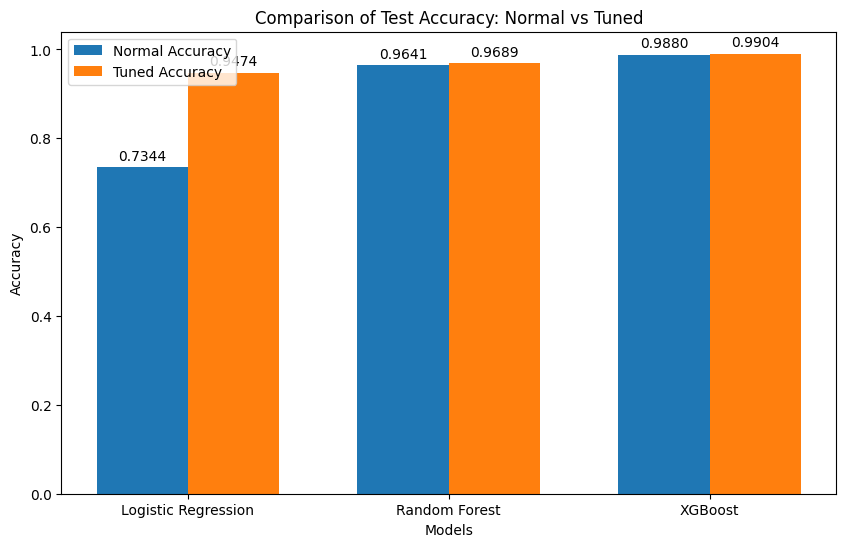

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the normal accuracy for each model (without GridSearchCV)
# Logistic Regression (default)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_train_accuracy = logreg.score(X_train, y_train)
logreg_test_accuracy = logreg.score(X_test, y_test)

# Random Forest (default)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_accuracy = rf.score(X_train, y_train)
rf_test_accuracy = rf.score(X_test, y_test)

# XGBoost (default)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_train_accuracy = xgb_model.score(X_train, y_train)
xgb_test_accuracy = xgb_model.score(X_test, y_test)

# Collect the accuracies for plotting
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
train_accuracies = [logreg_train_accuracy, rf_train_accuracy, xgb_train_accuracy]
test_accuracies = [logreg_test_accuracy, rf_test_accuracy, xgb_test_accuracy]

# After hyperparameter tuning (using the best model from GridSearchCV)
tuned_train_accuracies = [train_accuracy, train_accuracy_rf, train_accuracy_xgb]
tuned_test_accuracies = [test_accuracy, test_accuracy_rf, test_accuracy_xgb]

# Plotting the comparison of accuracies (before vs after tuning)
x = np.arange(len(models))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for normal vs tuned accuracy
bars1 = ax.bar(x - width/2, test_accuracies, width, label='Normal Accuracy')
bars2 = ax.bar(x + width/2, tuned_test_accuracies, width, label='Tuned Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Test Accuracy: Normal vs Tuned')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

# Display the plot
plt.show()


- Logistic Regression: The tuned model achieved a significant improvement in accuracy compared to the original model. This improvement indicates that the tuned model better adapts to the data.

- Random Forest: The Random Forest model saw a small improvement in accuracy after hyperparameter tuning, indicating that while the model was already performing well, fine-tuning led to a slight gain.


- XGBoost: XGBoost's performance improved slightly, with a marginal accuracy boost after tuning, but still remains a highly accurate model overall.

Summary :

In the Classification Part we have performed different tasks including :

- Importing data
- Exploratory data analysis
- Handling missing values
- Handling outliers
- Handling catagorical features
- Feature scaling
- Feature selection
- Training different models
- Hypertuning
- Results